# Machine Learning Model Building
The Model building of this project will be based on both surpervised machine learning and deep learning

**Supervised Machine Learning Used To Train And Evaluate The Dataset**

1.   Random Forest Classifier
2.   Decision Tree Classifier
3.   XGBoost Classifier
4.   Support Vector Machines

**Deep Learning Algorithms Implemented On The Dataset**


1.   Multilayer Perceptrons(MLP)
2.   Autoencoder Neural Networks











In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/URL_Data.csv')
df.head(10)


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [54]:
!pip install scikit-learn

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
y = df['Label']
df.drop('Domain',axis=1,inplace=True)
X = df.drop('Label',axis=1)#defining the variables

In [57]:
#Train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Implementation Of Supervised Machine Learning Models

# Decision Tree Classifier
A Decision Tree Classifier makes a series of if-else questions (decisions) about the characteristics of a website's URL and features to ultimately classify it as either phishing (1) or legitimate (0).

**Process**

1.Learning from Data

2.Splitting Based on Features

3.Branching Down

4.Reaching a Decision(Leaf Node)

In [58]:
# Creating holders to store the model performance results
ml_model_used = []
accuracy_score_train = []
accuracy_score_test = []

#function to call for storing the results
def store_results(model, a,b):
  ml_model_used.append(model)
  accuracy_score_train.append(round(a, 3))
  accuracy_score_test.append(round(b, 3))

In [59]:
tree=DecisionTreeClassifier(max_depth=5)#This is a specification of a hyperparameter for the model
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
#Predict
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [61]:
#Evaluation
accuracy_train_tree = accuracy_score(y_train,y_train_tree)
accuracy_test_tree = accuracy_score(y_test,y_test_tree)

print(f"Decision Tree: Accuracy on training Data:{accuracy_train_tree*100}")

print(f"Decision Tree: Accuracy on test Data:{accuracy_test_tree*100}")

Decision Tree: Accuracy on training Data:81.45
Decision Tree: Accuracy on test Data:80.60000000000001


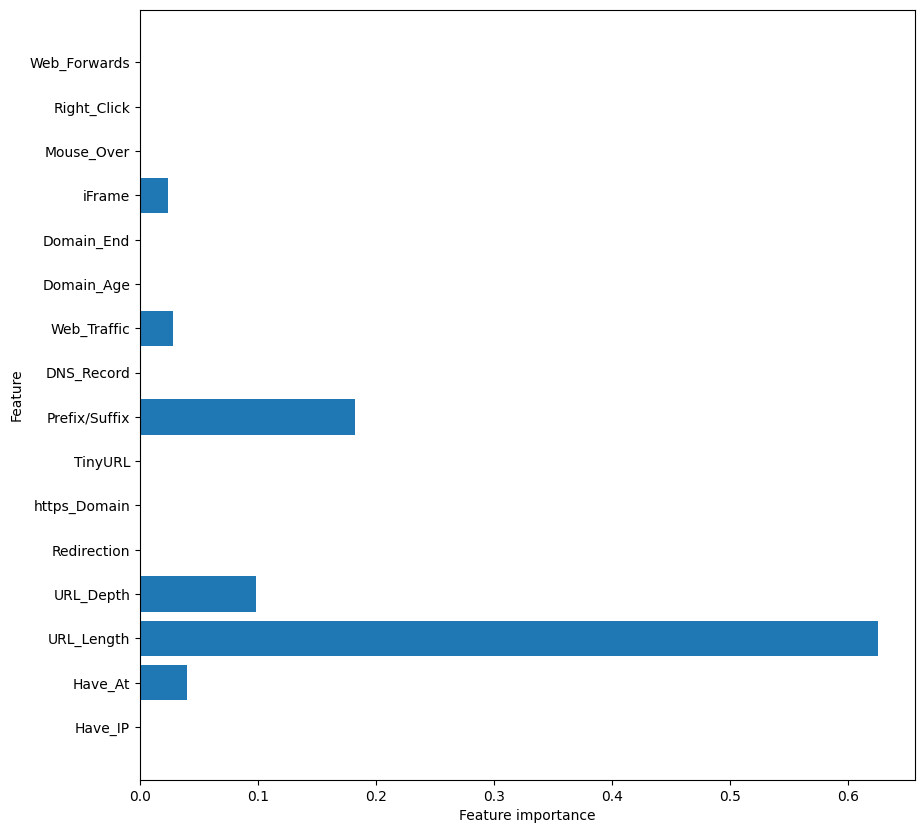

In [62]:
#Feature_importance
plt.figure(figsize=(10,10))
number_of_features = x_train.shape[1]
plt.barh(range(number_of_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(number_of_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [63]:
#Store the evaluation results
store_results('Decision Tree:',accuracy_train_tree,accuracy_test_tree)

# Random Forest Classifier
This uses many Decision Tree Classifiers, each trained on a slightly different random subset of your phishing website data and a random subset of the features. the classifier combines their predictions to make a final, more robust classification (phishing or legitimate).

**Process**

1.Multiple Trees

2.Random Subsampling(Introduces diversity of data)

3.Random Feature Selection

4.Combining Predictions

In [64]:
#Training
forest=RandomForestClassifier(max_depth=5)
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [65]:
#Predict
y_train_forest=forest.predict(x_train)
y_test_forest=forest.predict(x_test)

In [66]:
#Evaluation
accuracy_train_forest = accuracy_score(y_train,y_train_forest)
accuracy_test_forest = accuracy_score(y_test,y_test_forest)

print(f"Random forest: Accuracy on training Data:{accuracy_train_forest*100}")

print(f"Random forest: Accuracy on test Data: {accuracy_test_forest*100}")

Random forest: Accuracy on training Data:81.89999999999999
Random forest: Accuracy on test Data: 81.25


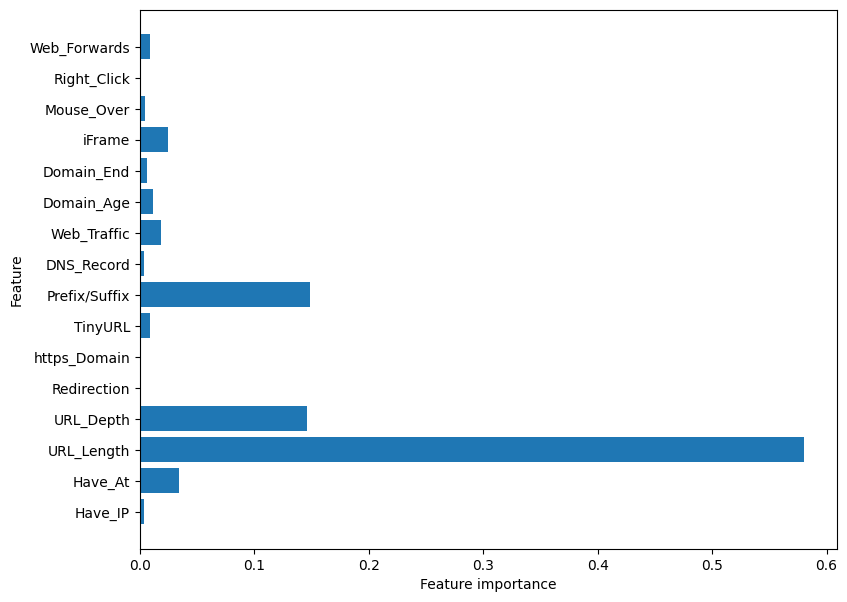

In [67]:
#Feature_importance
plt.figure(figsize=(9,7))
number_of_features = x_train.shape[1]
plt.barh(range(number_of_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(number_of_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [68]:
#Storing results
store_results('Random Forest:',accuracy_train_forest,accuracy_test_forest)

# Support Vector Machines(SVM)
A Support Vector Machine (SVM) aims at drawing the best possible line (or hyperplane in higher dimensions) to separate phishing websites from legitimate ones in your data., but with a focus on finding the most robust separation.

**Process**

1.Finding the Boundary

2.Maximizing the Margin(Seeks the one with the largest separating margin)

3.Support Vectors(Closest to the separating hyperplane)


In [69]:
svm=SVC(kernel='linear',C=1.0,random_state=42)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [70]:
#Predicting
y_train_svm=svm.predict(x_train)
y_test_svm=svm.predict(x_test)

In [71]:
accuracy_train_svm = accuracy_score(y_train,y_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_test_svm)

In [72]:
#Evaluation
print(f"Support Vector Machines: Accuracy on training Data:{accuracy_train_svm*100}")

print(f"Support Vector Machines: Accuracy on test Data:{accuracy_test_svm*100}")

Support Vector Machines: Accuracy on training Data:80.45
Support Vector Machines: Accuracy on test Data:79.25


In [73]:
#Storing
store_results('Support Vector Machines:',accuracy_train_svm,accuracy_test_svm)

# XGBoost Classifier
XGBoost Classifier builds a strong prediction model by combining many simpler decision trees, learning sequentially. Each new tree focuses on correcting the errors of the previous ones, using mathematical optimization to improve accuracy.

**Process**

1.  Initial guess
2.  Learn from mistakes(Correcting the mistakes of the previous weaker models)
3.  Combine smart guesses(Creates model based on the errors found improving it)
4.  Avoid over-learning
5.  Final answer: phishing or safe


In [74]:
xgb=XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
#predict
y_train_xgb=xgb.predict(x_train)
y_test_xgb=xgb.predict(x_test)

In [76]:
#Evaluation
accuracy_train_xgb = accuracy_score(y_train,y_train_xgb)
accuracy_test_xgb = accuracy_score(y_test,y_test_xgb)

print(f"XGBoost Classifier: Accuracy on training Data:{accuracy_train_xgb*100}")

print(f"XGBoost Classifier: Accuracy on test Data:{accuracy_test_xgb*100}")


XGBoost Classifier: Accuracy on training Data:86.75
XGBoost Classifier: Accuracy on test Data:85.6


In [90]:
#Storing
store_results('XGBoost Classifier:',accuracy_train_xgb,accuracy_test_xgb)


# Implementation of Deep Learning Models

# MultiLayer Perceptron(MLP)

The Multilayer Perceptron Algorithm takes input features (e.g., URL length, presence of @, HTTPS use), processes them through hidden layers to learn patterns, and outputs a prediction—phishing or legitimate.

https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning



In [78]:
from sklearn.neural_network import MLPClassifier

mlp=  MLPClassifier(alpha=0.001, hidden_layer_sizes=(100,100,100))

mlp.fit(x_train,y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100))

In [79]:
#Predict
y_train_mlp=mlp.predict(x_train)
y_test_mlp=mlp.predict(x_test)

In [80]:
#Evaluate
accuracy_train_mlp = accuracy_score(y_train,y_train_mlp)
accuracy_test_mlp = accuracy_score(y_test,y_test_mlp)

print(f"Multilayer Perceptron: Accuracy on training Data:{accuracy_train_mlp*100}")

print(f"Multilayer Perceptron: Accuracy on test Data:{accuracy_test_mlp*100}")

Multilayer Perceptron: Accuracy on training Data:86.46249999999999
Multilayer Perceptron: Accuracy on test Data:85.7


In [81]:
#Storing
store_results('Multilayer Perceptron:',accuracy_train_mlp,accuracy_test_mlp)

# Autoencoder Neural Network

The Autoencoder is trained solely on features extracted from legitimate websites. It learns the normal behavior and structure of safe websites. When presented with a phishing website, the Autoencoder is unable to accurately reconstruct the input, resulting in a high reconstruction error. This error can be used as an indicator to flag potentially malicious sites.

In [82]:
!pip install Keras


In [83]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [84]:
input_dimensions=x_train.shape[1]
encoding_dimensions=input_dimensions

#Building an encoder
input_layer = Input(shape=(input_dimensions,))
encoder = Dense(encoding_dimensions, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dimensions), activation="relu")(encoder)
encoder = Dense(int(encoding_dimensions-2), activation="relu")(encoder)
code = Dense(int(encoding_dimensions-4), activation='relu')(encoder)

# Bulding a decoder
decoder = Dense(int(encoding_dimensions-2), activation='relu')(code)
decoder = Dense(int(encoding_dimensions), activation='relu')(decoder)
decoder = Dense(input_dimensions, activation='sigmoid')(decoder)  # Typically, use 'sigmoid' for reconstruction

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 14)                  │             238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 14)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,656 (6.47 KB)

 Trainable params: 1,656 (6.47 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
#Compiling
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#Training
train_log=autoencoder.fit(x_train,x_train,epochs=100,batch_size=64,validation_split=0.2)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0816 - loss: 0.7929 - val_accuracy: 0.8438 - val_loss: -4.9260
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8410 - loss: -83.4869 - val_accuracy: 0.8438 - val_loss: -1681.3810
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8437 - loss: -7239.4722 - val_accuracy: 0.8438 - val_loss: -63921.1250
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8492 - loss: -154292.7344 - val_accuracy: 0.8438 - val_loss: -764262.0000
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8432 - loss: -1393267.0000 - val_accuracy: 0.8438 - val_loss: -4836000.5000
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8441 - loss: -7625343.0000 - val_accuracy: 0.8438 - val_loss: -20515518.0000
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8484 - loss: -29554372.0000 - val_accuracy: 0.8438 - val_loss: -67240968.0000
Epoch 8/100
100/100 

In [86]:
#Evaluation
#Evaluation of the accuracy of the  autoencoder.
accuracy_train_auto=autoencoder.evaluate(x_train,x_train)[1]
accuracy_test_auto=autoencoder.evaluate(x_test,x_test)[1]

print(f"Autoencoder Neural Network: Accuracy on training Data:{accuracy_train_auto*100}")

print(f"Autoencoder Neural Network: Accuracy on test Data:{accuracy_test_auto*100}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: -604986341851136.0000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: -674844991553536.0000
Autoencoder Neural Network: Accuracy on training Data:84.42500233650208
Autoencoder Neural Network: Accuracy on test Data:84.50000286102295


In [87]:
#Evaluation of the reconstruction loss.
reconstruction_loss_train_auto=autoencoder.evaluate(x_train,x_train)[0]
reconstruction_loss_test_auto=autoencoder.evaluate(x_test,x_test)[0]

print(f"Autoencoder Neural Network: Accuracy on training Data:{reconstruction_loss_train_auto*100}")

print(f"Autoencoder Neural Network: Accuracy on test Data:{reconstruction_loss_test_auto*100}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: -604986341851136.0000
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8423 - loss: -674844991553536.0000
Autoencoder Neural Network: Accuracy on training Data:-6.06182020481024e+16
Autoencoder Neural Network: Accuracy on test Data:-6.57514664296448e+16


In [88]:
#Storing
store_results('Autoencoder Neural Network:',accuracy_train_auto,accuracy_test_auto)

# Comparison of The Models

In [93]:
results = pd.DataFrame({ 'ML Model': ml_model_used,
    'Train Accuracy': accuracy_score_train,
    'Test Accuracy': accuracy_score_test})
results


,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree:,0.815,0.806
1,Random Forest:,0.819,0.812
2,Support Vector Machines:,0.804,0.792
3,Multilayer Perceptron:,0.865,0.857
4,Autoencoder Neural Network:,0.844,0.845
5,XGBoost Classifier:,0.868,0.856


In [94]:
#Sorting
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,Multilayer Perceptron:,0.865,0.857
5,XGBoost Classifier:,0.868,0.856
4,Autoencoder Neural Network:,0.844,0.845
1,Random Forest:,0.819,0.812
0,Decision Tree:,0.815,0.806
2,Support Vector Machines:,0.804,0.792
